In [11]:
# Import
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Parameters
n = 30
num = 59999999999991
max_threads = 16

In [13]:
optimization = 'O2'
csv_name = "output_inefficient"

csv_path = csv_name + "_" + optimization + ".csv"

In [14]:
CSV = pd.read_csv(csv_path)

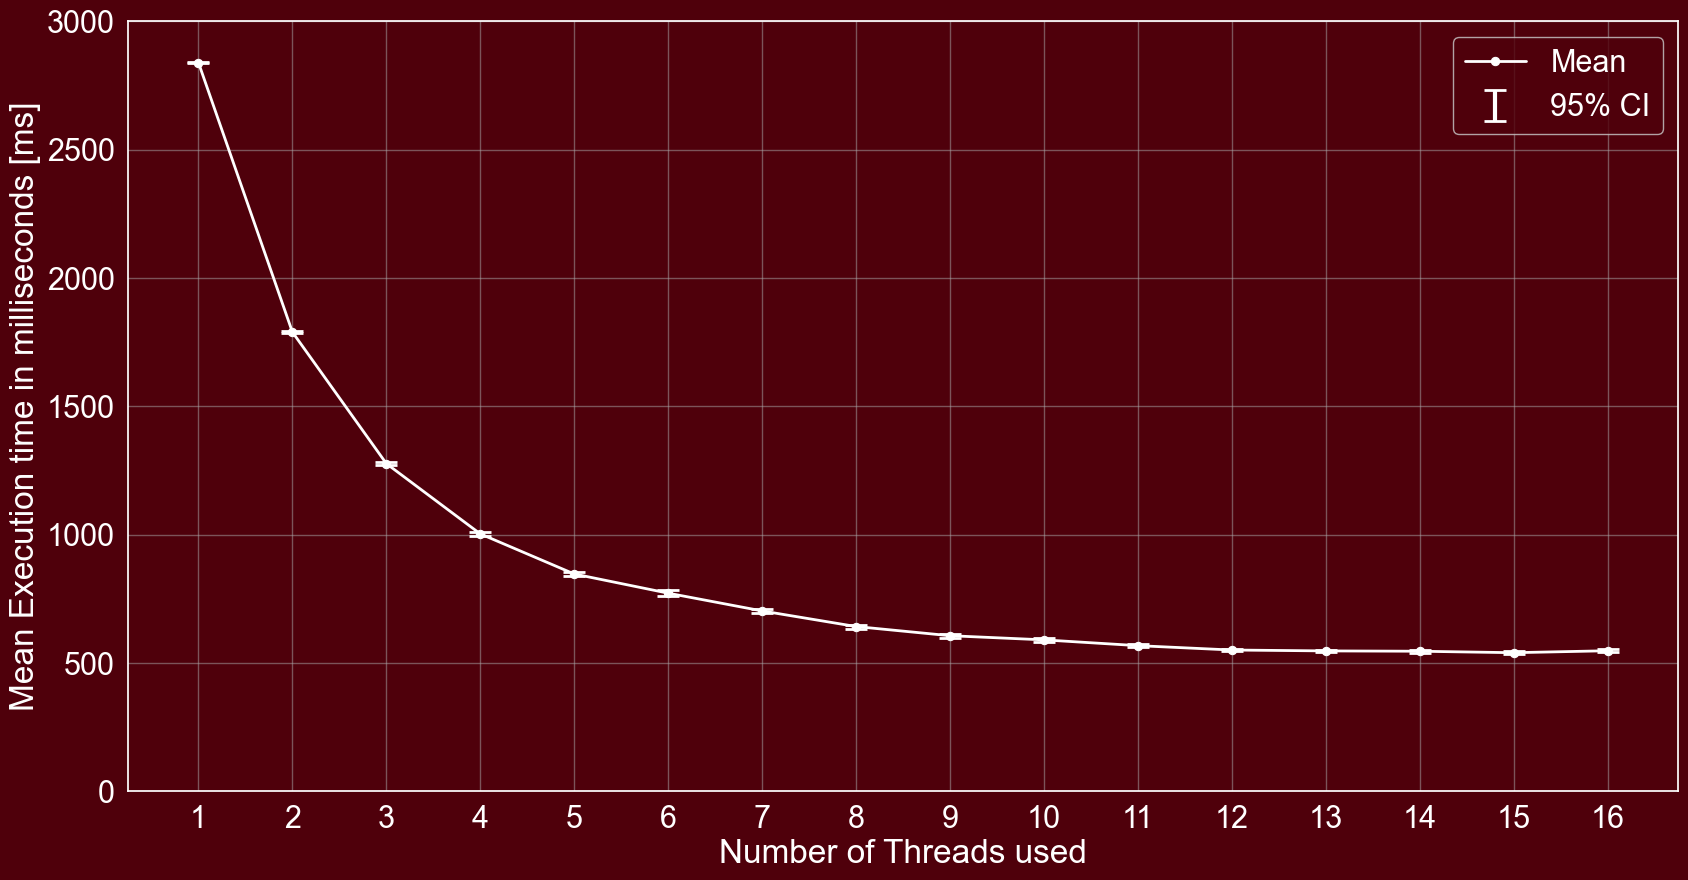

In [15]:
# Execution Time
red_backgroud = True

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 
    line_color = 'white'
    line_width = 2
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 
    line_color = '#4F000B'
    line_width = 2

y_V = []

ci = []

thread_ticks = sorted(CSV['num_threads'].unique())

for thread in range(1, max_threads+1):

    y_V.append(CSV[CSV["num_threads"] == thread]["execution_time"].mean())
    ci.append(1.96 * (CSV[CSV["num_threads"] == thread]["execution_time"].std() / math.sqrt(n)))


plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, label="95% CI", color=line_color, lw=3, capthick=2)

sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean", color=line_color, linewidth=line_width)
    
plt.xlabel('Number of Threads used')
plt.ylabel('Mean Execution time in milliseconds [ms]')

plt.ylim(0, 3000)

plt.xticks(thread_ticks)

plt.legend()
plt.show()

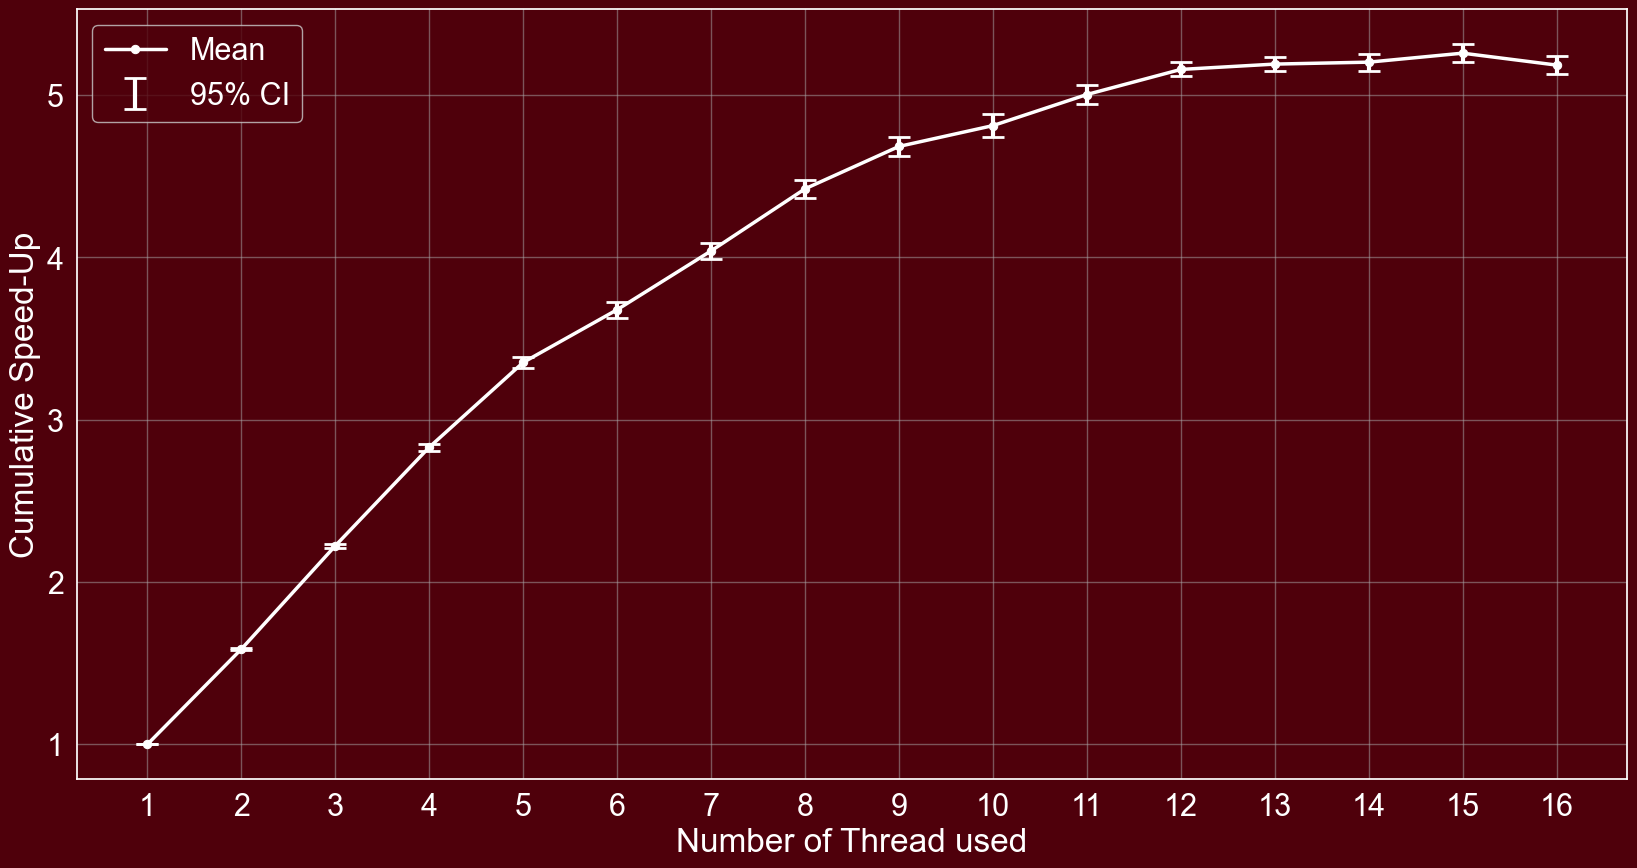

In [18]:
# Cumulative Speedup
red_backgroud = True

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 
    line_color = 'white'
    line_width = 2.5
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 
    line_color = '#4F000B'
    line_width = 3

y_V = []

ci = []

thread_ticks = sorted(CSV['num_threads'].unique())

for thread in range(1, max_threads+1):

    y_V.append(CSV[CSV["num_threads"] == 1]["execution_time"].mean() / CSV[CSV["num_threads"] == thread]["execution_time"].mean())
    ci.append(1.96 * ((CSV[CSV["num_threads"] == 1]["execution_time"] / CSV[CSV["num_threads"] == thread]["execution_time"].reset_index(drop=True)).std() / math.sqrt(n)))


plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, color=line_color, label="95% CI", lw=3, capthick=2)

sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean", color=line_color, linewidth=line_width)
    
plt.xlabel('Number of Thread used')
plt.ylabel('Cumulative Speed-Up')

plt.xticks(thread_ticks)


plt.legend()
plt.show()

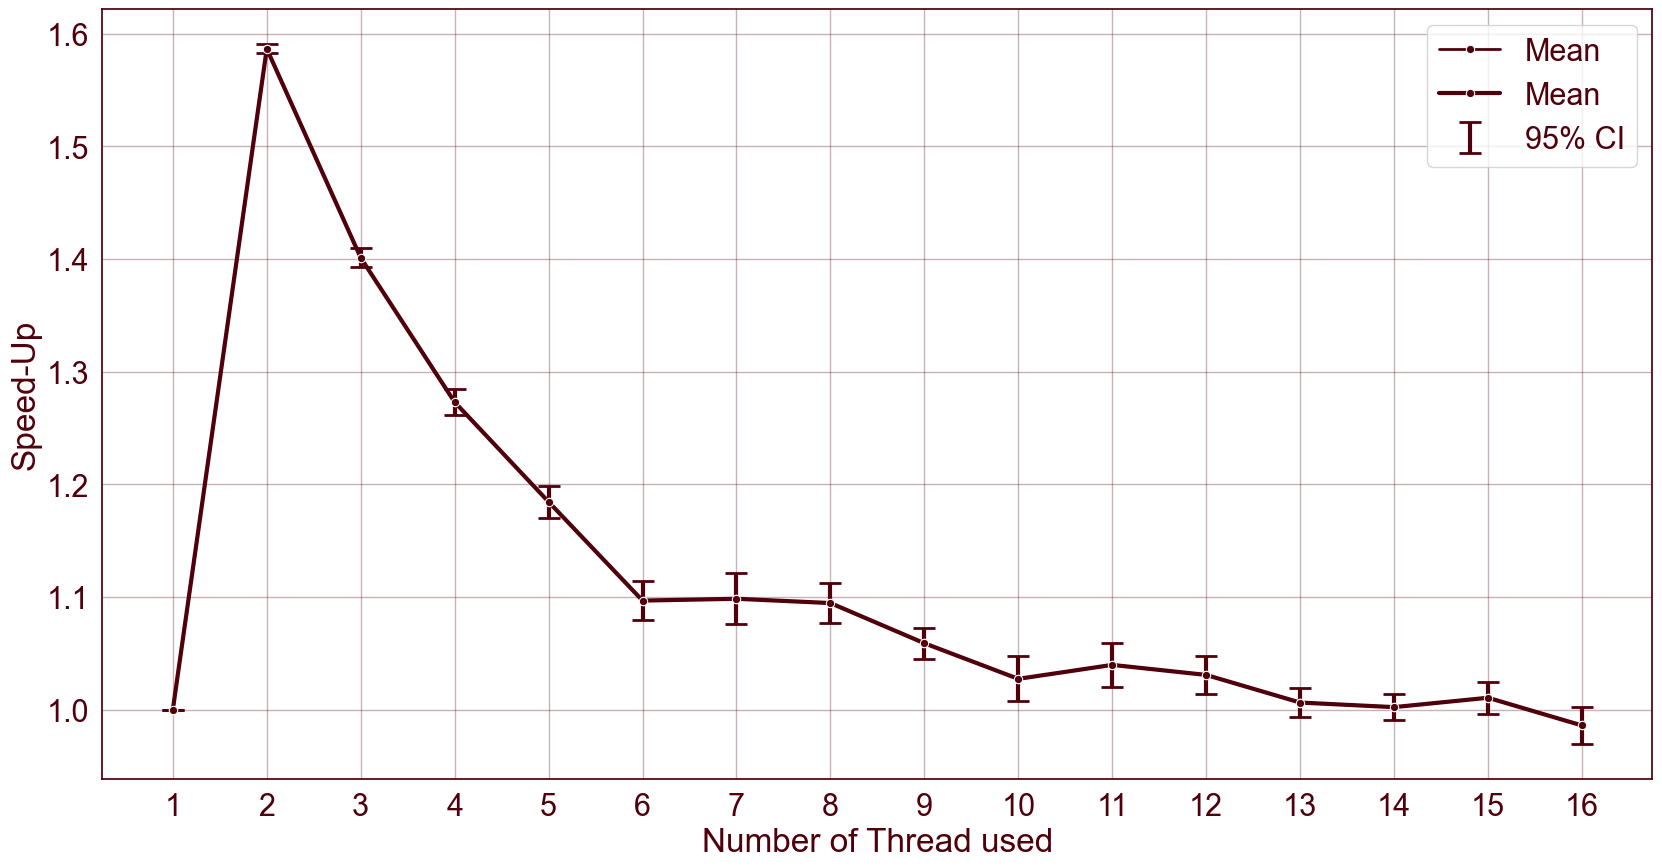

In [17]:
# Speedup
red_backgroud = False

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 
    line_color = 'white'
    line_width = 2.5
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 
    line_color = '#4F000B'
    line_width = 3
y_V = []

ci = []

thread_ticks = sorted(CSV['num_threads'].unique())

for thread in range(1, max_threads+1):

    if thread == 1:
        y_V.append(1)
        ci.append(0)
    else:
        y_V.append(CSV[CSV["num_threads"] == (thread-1)]["execution_time"].mean() / CSV[CSV["num_threads"] == thread]["execution_time"].mean())
        ci.append(1.96 * ((CSV[CSV["num_threads"] == (thread-1)]["execution_time"].reset_index(drop=True) / CSV[CSV["num_threads"] == thread]["execution_time"].reset_index(drop=True)).std() / math.sqrt(n)))


plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, color=line_color, label="95% CI", lw=3, capthick=2)

sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean", color=line_color, linewidth=2)
sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean", color=line_color, linewidth=line_width)
plt.xlabel('Number of Thread used')
plt.ylabel('Speed-Up')

plt.xticks(thread_ticks)


plt.legend()
plt.show()